# 18.06 Pset 5 - Solutions

## Problem 1

(From Strang, section 10.1, question 17.)  Suppose $A$ is a $12 \times 9$ incidence matrix from a connected (but unknown) graph.

1. How many columns of $A$ are independent?
2. What condition on $f$ makes it possible to solve $A^T y = f$.  (Give an explicit formula, don't just say $f \in C(A^T)$ or similar.)
3. The diagonal entries of $A^T A$ give the number of edges into each node.  What is the sum of those diagonal entries?

### Solution

1. Since the graph is connected, the null space of $A$ is spanned by the vector $(1,1,...,1)^T$ and so it is one-dimensional. So the rank of $A$ is $9-1=8$. Thus there are 8 independent columns in $A$.
2. The column space of $A^T$ is orthogonal to the null space of $A$, so a vector $f$ is in $C(A^T)$ if and only if its dot product with the vector $(1,1,...,1)^T$ is zero. That is $A^Ty=f$ has solutions if and only if the sum of the entries of $f$ is zero.
3. If we sum the number of edges touching each node, we count each edge twice (once for when it exits a vertex and once for when it enters a vertex). So, since there are 12 edges, the sum of the diagonal entries of $A^TA$ is $12\times 2=24$.

## Problem 2

In class, we represented a graph by an incidence matrix.  Another way to represent a graph by a matrix is to use an [adjacency matrix](https://en.wikipedia.org/wiki/Adjacency_matrix).

For a graph with $n$ nodes, the adjacency matrix $A$ is a *square* $n\times n$ matrix, where $A_{i,j} = 1$ if there is an edge from node $i$ to node $j$, and is zero otherwise.

For example, consider the example graph used in lecture:
<img src="https://github.com/stevengj/1806-spring17/raw/master/psets/pset5/pset5-p2.png" width="350">
Its adjacency matrix is:

In [1]:
A = [0 0 0 1 0 0
     1 0 0 0 0 1
     0 1 0 0 0 0
     0 0 0 0 1 1
     0 0 0 0 0 1
     0 0 1 0 0 0]

6x6 Array{Int64,2}:
 0  0  0  1  0  0
 1  0  0  0  0  1
 0  1  0  0  0  0
 0  0  0  0  1  1
 0  0  0  0  0  1
 0  0  1  0  0  0

### part (a)

Consider a vector $x = (1,0,0,0,0,0)$, which has a nonzero entry only in node 1.  If we multiply this by $A^T$ one or two times, we get:

In [2]:
x = [1,0,0,0,0,0]
A' * x

6-element Array{Int64,1}:
 0
 0
 0
 1
 0
 0

In [3]:
A'^2 * x

6-element Array{Int64,1}:
 0
 0
 0
 0
 1
 1

* What is the smallest power $n$ of $A^T$ such that $x^T (A^T)^n x > 0$?  Why?
* How does this change if we use $A$ instead of $A^T$?

### part (b)

The smallest power of $A$ that gives an entry $> 1$ is $A^4$, for which the $(2,6)$ entry is equal to 2.   This is because node 2 and 6 are connected by ???????? of length 4.

In [4]:
A^4

6x6 Array{Int64,2}:
 0  1  1  0  0  0
 1  0  1  0  0  2
 0  1  0  0  1  1
 1  1  0  0  0  1
 1  0  0  0  0  1
 0  0  1  1  0  0

### Solution

#### part (a)

If we repeatedly multiply $x$ by $A^T$, the first time $x^T (A^T)^n x$ becomes nonzero, i.e. the first time we get a nonzero element in the first component of $(A^T)^n x$, is for $\boxed{n=5}$, which you can see just by trying it: 

In [5]:
(A')^5 * x

6-element Array{Int64,1}:
 1
 1
 0
 0
 0
 1

Why is this?  If you look at what is happening when you multiply a vector by $A^T$, it quickly becomes clear that $A^T$ "moves" the entries along the edges.  That's why $A^T x = (0,0,0,1,0,0)$: it moves the entry from node 1 to node 4 along edge 1.  And $(A^T)^2 x = (0,0,0,0,1,1)$: it moves the entry from node 4 to *both* nodes 5 and 6 along edges 3 and 8.

So, in order to ask when $x^T(A^T)^nx$ will be nonzero, we just have to ask what is the shortest number of edges that will move from node 1 back to node 1 (a cycle).  Looking at the graph, the shortest such cycle goes along edges 1–8–4–5–6, which has length 5, hence we need $(A^T)^5 x$.

##### More detail

More precisely, the value of $x^T(A^T)^nx$ is the number of cycles of length $n$ starting and ending from the first vertex. In fact the $(i,j)$-entry of $(A^T)^n$ is exactly the number of paths of length $n$ from the $j$-th vertex to the $i$-th vertex!

We can show this by induction: for $n=1$ this is just the definition of $A$ (that has 1 or 0 depending on whether there is an edge, that is a path of length one, from $i$ to $j$). Assuming we know that description of the entries of $(A^T)^n$ we can describe the $(i,j)$-entry of $(A^T)^{n+1}$ as
$$\sum_{k=1}^n (A^T)^n_{i,k}(A^T)_{k,j} =\sum_{k=1}^n \#\{\textrm{paths of length $n$ between $k$ and $i$}\}\#\{\textrm{ paths of length 1 between $j$ and $k$}\}$$
But the final sum is the sum for all $k$ of all paths of length $n+1$ between $j$ and $i$ whose first step lands in $k$. So it is the number of paths of length $n+1$ from $j$ to $i$.

So now it is immediately clear that $x^T(A^T)^nx$ is just the $(1,1)$-entry of $(A^T)^n$, that is the number of cycles of length $n$ that start and end on the first vertex. The shortest one has length 5 (1->4->6->3->2->1) and so the minimum $n$ is 5. Since replacing $A$ with $A^T$ corresponds to change the direction we go through the cycle, replacing $A$ by $A^T$ does nothing in this case.

#### part (b)

This is because node 2 and 6 are connected by two paths of length 4 (2->1->4->5->6 and 2->6->3->2->6)

## Problem 3: Nonlinear equations and Newton's method

18.06 is about linear systems of equations, but often real-world problems involve *nonlinear* equations.  But linear algebra is still useful in such cases!  Often, we solve nonlinear equations by *approximating* them by a *sequence* of *linear* equations.  One common such technique is the multidimensional Newton's method.  You will explore an application of that in this problem.

**Turn in a printout of any code you write and plots you make along with your solutions.**

Suppose we are solving the system of nonlinear equations:
$$
x_1^3 - 3 x_1 x_2^2 + x_1 - 1 = 0 \\
3 x_1^2 x_2 - x_2^3 + x_2 = 0
$$
in two real variables $x_1$ and $x_2$.  We can also write this as a vector equation $v(x) = 0$, where
$$
x = \begin{pmatrix} x_1 \\ x_2 \end{pmatrix}, \qquad
v(x) = \begin{pmatrix} x_1^3 - 3 x_1 x_2^2 + x_1 - 1 \\ 3 x_1^2 x_2 - x_2^3 + x_2 \end{pmatrix}.
$$

The key to Newton's method is this: given a *guess* for $x$, we *approximate* our function $v$ for *nearby* $x+\delta$ by a *linear* approximation, given by the Taylor expansion of $v$ to first order.  In particular, if
$$
\delta = \begin{pmatrix} \delta_1 \\ \delta_2 \end{pmatrix},
$$
the multidimensional Taylor expansion takes the form:
$$
v(x+\delta) = v(x) + J(x) \delta + \cdots
$$
where $J(x)$ is some matrix.

### part (a)

Write down an explicit **equation for the entries of the matrix $J(x)$** in the Taylor expansion of our function $v(x)$ above.

Recall from 18.02, that we can Taylor expand a function $f(x_1,x_2)$ as
$$
f(x_1 + \delta_1, x_2 + \delta_2) = f(x_1,x_2) + \left. \frac{\partial f}{\partial x_1} \right|_{x_1,x_2} \delta_1 + \left. \frac{\partial f}{\partial x_2} \right|_{x_1,x_2} \delta_2 + \cdots \; .
$$
If you apply this to each component of $v(x)$, you should get a formula for the matrix $J(x)$.

#### Solution 

##### Method 1
The matrix $J(x)$, from class, is precisely the Jacobian matrix: it has entries the partial derivatives of $v$ with respect to $x_1$ and $x_2$. 
$$ J(x) = \begin{pmatrix}3x_1^2-3x_2^2+1 & -6x_1x_2\\
                         6x_1x_2 & 3x_1^2-3x_2^2+1\end{pmatrix}$$
##### Method 2
Let us expand $J(x+\delta)$
$$ v(x+\delta) = \begin{pmatrix}(x_1+\delta_1)^3-3(x_1+\delta_1)(x_2+\delta_2)^2+x_1+\delta_1-1\\
                                3(x_1+\delta_1)^2(x_2+\delta^2)-(x_2+\delta_2)^3+x_2+\delta_2\end{pmatrix} = v(x)+\begin{pmatrix}3x_1^2\delta_1 -3x_2^2\delta_1-6x_1x_2\delta_2+\delta_1\\
                    6x_1x_2\delta_1 + 3x_1^2\delta_2 - 3x_2^2\delta_2 + \delta_2\end{pmatrix}+\cdots$$
So that
$$ J(x) = \begin{pmatrix} 3x_1^2-3x_2^2+1 & -6x_1x_2\\
                          6x_1x_2 & 3x_1^2-3x_2^2+1\end{pmatrix}$$
                          

### part (b)

**Write a Julia function `J(x)`** that, given a vector `x`, returns the matrix $J(x)$ using your formula from (a).  For example, here is a function `v(x)` returning the column vector $v(x)$:

In [6]:
v(x) = [   x[1]^3-3*x[1]*x[2]^2+x[1]-1
           3*x[1]^2*x[2]-x[2]^3+x[2]    ]

v (generic function with 1 method)

In a similar style, implement the function $J(x)$ returning a 2×2 matrix.

#### Solution:

Transcribing the formla from above, we have

In [7]:
J(x)=[ 3*x[1]^2-3*x[2]^2+1    -6*x[1]*x[2]
       6*x[1]*x[2]             3*x[1]^2-3*x[2]^2+1 ]

J (generic function with 1 method)

### part (c)

To get a Newton step, we replace $x$ by $x+\delta$, where $\delta$ is the solution to 
$$
v(x) + J(x)\delta = 0 \; .
$$
That is, we approximate $v(x+\delta)$ by the first-order Taylor expansion, and use this to approximately solve $v(x+\delta) \approx 0$. 

**Write a Julia function `newtonstep(x)`** that takes a vector $x$ and returns the Newton step $x+\delta$ given by the solution to the first-order (linear!) equation above.  (Recall that if you are solving $Ax=b$, the solution $x$ in Julia is `A \ b`.)  Use your functions `v(x)` and `J(x)` from (b)!

#### Solution

(This was actually solved in lecture.)  The equation $v(x)+J(x)\delta=0$ has solution $\delta=-J(x)^{-1}v(x)$ so we can write

In [8]:
newtonstep(x)=x-J(x)\v(x)

newtonstep (generic function with 1 method)

### part (d)

It turns out that there are exactly 3 real solutions to $v(x) = 0$
$$
x_1 = 0.6823278038280195, \; x_2 = 0
$$
and
$$
x_1 = -0.3411639019140098, \; x_2 = \pm 1.1615413999972526
$$

If you give an initial guess of $(0.5,0.1)$, you should see that the Newton steps rapidly converge towards the first solution.

Run the following code to interactively change the number of Newton iterations and see the results.  **How many Newton iterations do you need to get $x_1 = 0.6823278038280195$ with 4 correct digits?  How many for 10 digits?**

#### Solution:

It converges to 4 digits after 3 iterations.  To illustrate this graphically, we can plot the error on a log scale as a function of the number of iterations:

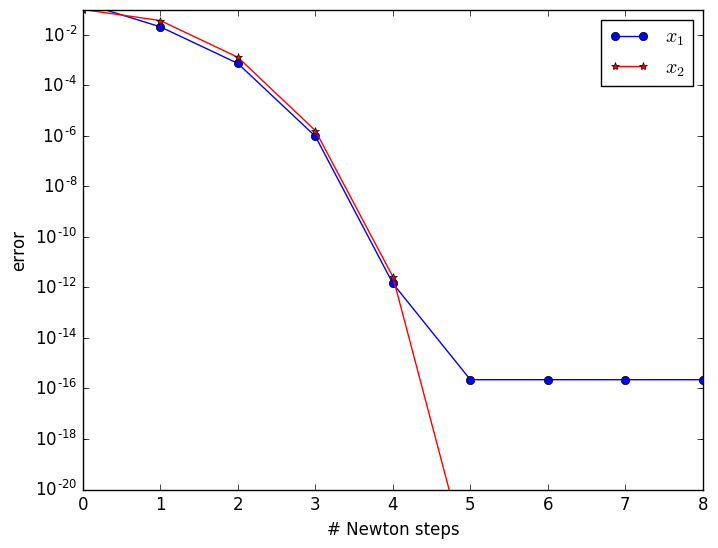

(1.0e-20,0.1)

In [9]:
err1 = Float64[]
err2 = Float64[]
for iterations in 0:8
    x = [0.5, 0.1]
    for i = 1:iterations
        x = newtonstep(x)
    end
    push!(err1, abs(x[1] - 0.6823278038280195))
    push!(err2, abs(x[2]))
end

using PyPlot
semilogy(0:8, err1, "bo-")
semilogy(0:8, err2, "r*-")
xlabel("# Newton steps")
ylabel("error")
legend([L"x_1", L"x_2"])
ylim(1e-20, 0.1)

As mentioned in class, it asymptotically doubles the number of correct digits on each step (so-called "quadratic" convergence), until it becomes limited by roundoff errors.

### part (e)

What solution the Newton steps converge to (or whether they converge at all!) depends strongly on our initial guess.  If the initial guess is close to a solution, it will converge to that solution, but if the initial guess is far away then the behavior is much less predictable.

The following code tries the Newton iterations for different starting points $(x_1,x_2)$, and uses a different color depending on which root was found.  (It plots the exact solutions as stars.) **What do you notice about the pattern of colors, especially on the *boundaries* between the regions that converge to one solution or another?**

(You might want to change the range of $x_1$ and $x_2$ that are plotted to zoom in on the boundaries.)

In [10]:
# do repeated newton steps, starting at x, until
# the solution converges or maxiters is reached,
# returning the tuple: (solution x, number of iterations)
function newton(x, maxiters=100)
    for i = 1:maxiters
        xnew = newtonstep(x)
        norm(xnew - x) < 1e-12 && return (x, i)
        x = xnew
    end
    return (x, maxiters)
end

newton (generic function with 2 methods)

#### Solution

Using the provided code, let's plot our results:

In [11]:
# Pkg.add("PyPlot")  # uncomment this line if you haven't installed PyPlot yet
using PyPlot

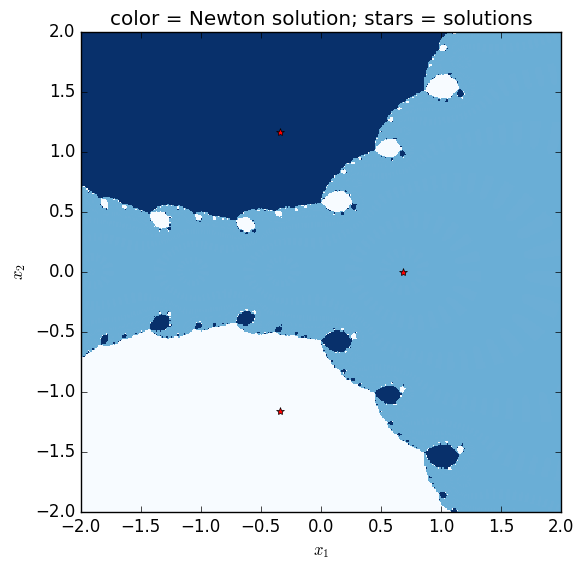

PyObject <matplotlib.text.Text object at 0x327682a10>

In [12]:
x₁ = linspace(-2,2,400) # 400 equally spaced points from -2 to 2
x₂ = linspace(-2,2,400) # 400 equally spaced points from -2 to 2

# perform Newton iterations and plot the results for all (x₁,x₂)
results = [newton([x₁,x₂]) for x₂ in x₂, x₁ in x₁]
pcolor(x₁', x₂, map(r -> atan2(r[1][2], r[1][1]), results), cmap="Blues")

# plot stars for the locations of the exact solutions:
sols = [0.6823278038280195  0.0
       -0.3411639019140098  1.1615413999972526
       -0.3411639019140098 -1.1615413999972526]
plot(sols[:,1], sols[:,2], "r*")

axis("square")
xlabel(L"x_1")
ylabel(L"x_2")
title("color = Newton solution; stars = solutions")

The *key points* to notice are:

* When the starting guess is *close* to a root (star), then it converges to that root.  This is sometimes called a "basin" of convergence around that root.

* When the starting guess is on the *boundary* between the basins of two roots, then which root it converges to is **extremely sensitive** to the starting guess.   Slight changes in the initial $x$ can change the result completely!   The result is actually something called a [Newton fractal](https://en.wikipedia.org/wiki/Newton_fractal).

It is also interesting to plot the number of iterations that were required to converge as a function of $(x_1,x_2)$:

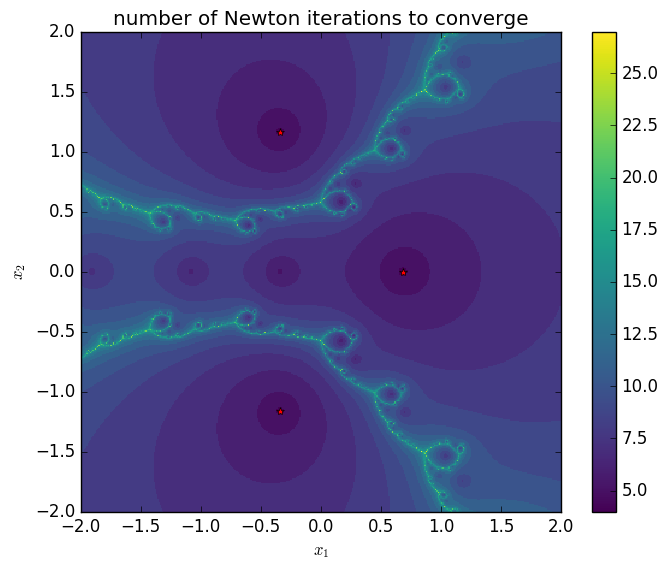

PyObject <matplotlib.text.Text object at 0x3316fbf90>

In [13]:
pcolor(x₁', x₂, map(r -> r[2], results), cmap="viridis")
plot(sols[:,1], sols[:,2], "r*")
axis("square")
xlabel(L"x_1")
ylabel(L"x_2")
colorbar()
title("number of Newton iterations to converge")

As you probably could guess, the closer you start to a root, the faster it converges.  On the boundary between two roots, however, it can converge very slowly — the Newton iterations "hop around" for a while before settling down to a solution.

Finally, to see the fractal behavior more clearly, we can re-do our plot from above, but zoom in on the boundary:

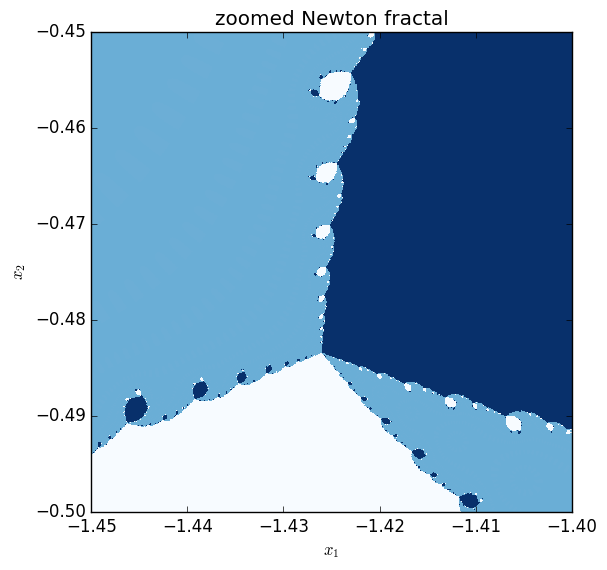

PyObject <matplotlib.text.Text object at 0x34d700e90>

In [18]:
x₁ = linspace(-1.45,-1.4,800)
x₂ = linspace(-0.5,-0.45,800)

# perform Newton iterations and plot the results for all (x₁,x₂)
results = [newton([x₁,x₂]) for x₂ in x₂, x₁ in x₁]
pcolor(x₁', x₂, map(r -> atan2(r[1][2], r[1][1]), results), cmap="Blues")

axis("square")
xlim(minimum(x₁), maximum(x₁))
ylim(minimum(x₂), maximum(x₂))
xlabel(L"x_1")
ylabel(L"x_2")
title("zoomed Newton fractal")

Neat, huh?